 ## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## read data from csv file

In [3]:
fooddf=pd.read_csv('indian_food.csv')

In [4]:
fooddf.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [5]:
fooddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


## Ratio of vegetarian and non-vegetarian dishes?

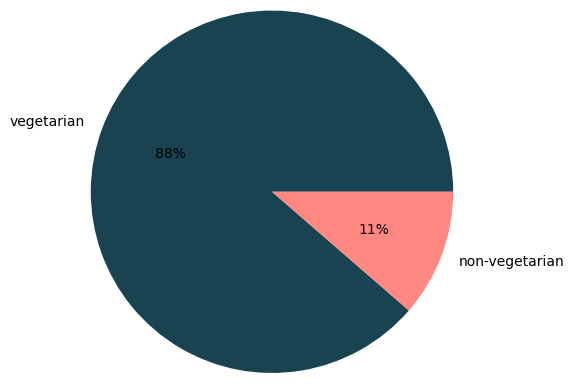

In [8]:
plt.figure(dpi=100,figsize=(4,4))
plt.pie(fooddf['diet'].value_counts(),labels=['vegetarian','non-vegetarian']\
        ,autopct="%d%%",colors=['#194350','#ff8882'],radius=1.5)

plt.show()

# observation-major population in india is vagatarian.
## Funfact-India is ranked top in the world with 38% of the total population being vegetarians.

## Number of dishes based on state

In [43]:
statewisefood=fooddf['state'].value_counts()
statewisefood.drop(labels=['-1'],inplace=True)

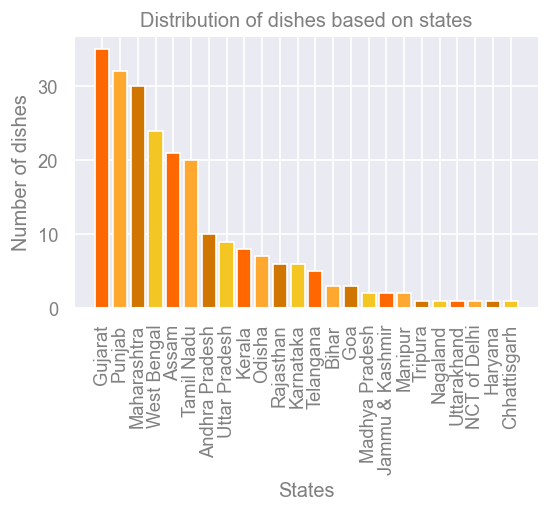

In [213]:
colors=['#ff6701','#fea82f','#cf7500','#f3c623']
plt.figure(dpi=120,figsize=(5,3))
plt.bar(statewisefood.index,statewisefood.values,color=colors)
plt.xticks(rotation=90,color='grey')
plt.yticks(color='grey')
plt.xlabel('States',color='grey')
plt.ylabel('Number of dishes',color='grey')
plt.title('Distribution of dishes based on states',color='grey')
sns.set()
plt.show()


In [66]:
fooddf['course'].value_counts()

main course    129
dessert         85
snack           39
starter          2
Name: course, dtype: int64

## Preparation time vs cook time

In [11]:
df=fooddf[(fooddf['prep_time']>400) | (fooddf['cook_time']>400)]
df
middf=fooddf[((fooddf['prep_time']>200) &(fooddf['prep_time']<400)) | \
             ((fooddf['cook_time']>200) & (fooddf['cook_time']<400))]
middf.shape[0]
middf['name'].tolist()

['Poornalu',
 'Chak Hao Kheer',
 'Tandoori Chicken',
 'Tandoori Fish Tikka',
 'Dosa',
 'Idli',
 'Masala Dosa']

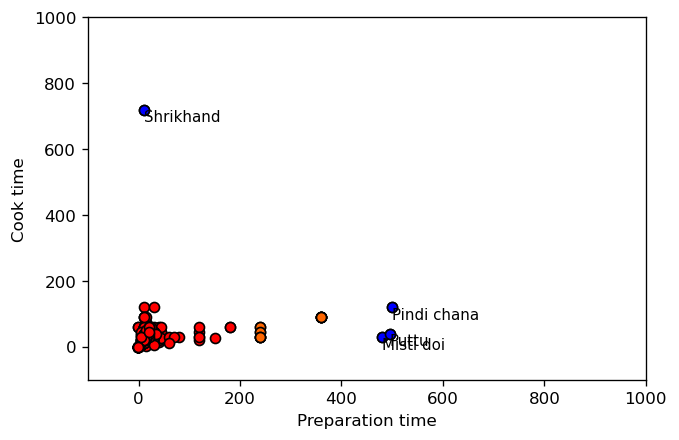

In [12]:
plt.figure(figsize=(6,4),dpi=120)
plt.scatter(fooddf['prep_time'],fooddf['cook_time'],color='red',edgecolor='k',cmap=plt.cm.Set1)
plt.xlabel("Preparation time")
plt.ylabel("Cook time")
plt.scatter(df['prep_time'],df['cook_time'],color='blue',edgecolor='k')
plt.scatter(middf['prep_time'],middf['cook_time'],color='#ff6701',edgecolor='k')
plt.xlim(-100,\
         1000)
plt.ylim(-100\
         ,1000)

for i in range(df.shape[0]):
    plt.text(df['prep_time'].tolist()[i],df['cook_time'].tolist()[i],df['name'].tolist()[i],fontsize=9,animated=True,va='top')
plt.show()

## Dishes having shortest cook time

In [189]:
shortest_cooktime_snack=fooddf[fooddf['course']=='snack'][['name','cook_time']]
shortest_cooktime_snack=shortest_cooktime_snack.sort_values('cook_time',ascending=True)
s=shortest_cooktime_snack[3:13]
s

,name,cook_time
109,Pani puri,2
111,Papad,5
147,Papadum,5
212,Lilva Kachori,6
214,Khichu,10
207,Surnoli,10
178,Kutchi dabeli,10
175,Chorafali,15
181,Dhokla,20
164,Upma,20


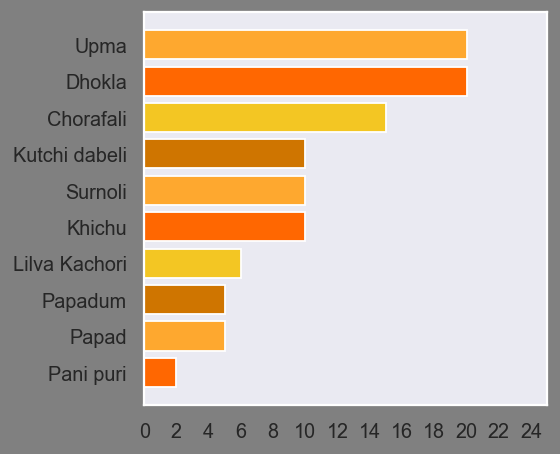

In [224]:
plt.figure(dpi=130,figsize=(4,4),facecolor='grey')
plt.yticks(rotation=0)
plt.xticks(np.arange(0,26,2))
#plt.facecolor('k')
plt.xlim(0,25)
plt.grid()
#plt.background('black')
plt.barh(s['name'],s['cook_time'],color=colors)
plt.show()